# R2 Score
The why, what, and how of R2 score with examples and plots.

## Dataset
Let's start by creating a synthetic dataset, and exploring the $R^2$ math equation.

We'll break it down into it's parts, write code for each of them, and then combine them to calculate the $R^2$ score.

In [1]:
import sys
import numpy as np
from sklearn import datasets, linear_model, metrics

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="white")

print("Python version: {}". format(sys.version))
print("NumPy version: {}". format(np.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))

Python version: 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:24:02) 
[Clang 11.1.0 ]
NumPy version: 1.22.4
matplotlib version: 3.5.1
seaborn version: 0.11.2


In [2]:
X, y = datasets.make_regression(
    n_samples=101, n_features=1, noise=15, random_state=4
)

In [3]:
X.shape, y.shape

((101, 1), (101,))

In [4]:
min(X[:,0])

-2.379775273987008

Text(0, 0.5, 'Y')

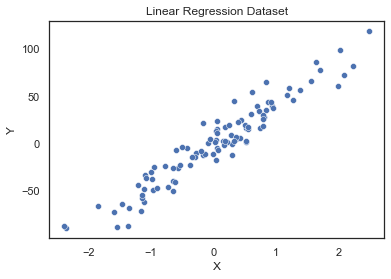

In [5]:
sns.scatterplot(x=X[:,0], y=y)
plt.title("Linear Regression Dataset")
plt.xlabel("X")
plt.ylabel("Y")

## $R^2$ Equation

$$ R^2 = \frac{\text{ Var(mean) } - \text{ Var(line / fit) }}{\text{ Var(mean) }} $$

<br />

This equation has two parts:
1. Variance around the mean.

2. Variance around the line / fit.


### Variance around the Mean
Variance (denoted as $\sigma^2$) is defined as: 

### For a population
$$ 
\sigma^2 = \frac{1}{N}\sum{(y_i - \bar{y})^2}
$$

where $\bar{y}$ is the population mean, $y_i$ is the $i^{th}$ element from the population, and $ N $ is the population size.

### For a sample
$$ 
\sigma^2 = \frac{1}{N - 1}\sum{(y_i - \bar{y})^2}
$$

where $\bar{y}$ is the population mean, $y_i$ is the $i^{th}$ element from the population, and $ N $ is the population size.


In [6]:
target_mean = np.mean(y)
target_mean

1.1768932931378253

In [7]:
def variance_around_mean(y_truth):
    target_mean = np.mean(y_truth)
    n_samples = y_truth.shape[0]
    return np.sum(np.power(y_truth - target_mean, 2)) / n_samples

var_mean = variance_around_mean(y)

print("Variance around the mean: {}".format(var_mean))

Variance around the mean: 1860.8668716260763


In [8]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X, y)
print("Weights:", lin_reg.coef_, "Biases:", lin_reg.intercept_)

Weights: [42.51715605] Biases: -0.6187640292899277


In [9]:
y_pred = lin_reg.predict(X)

### Variance around the Line
Variance (denoted as $\sigma^2$) is defined as: 

$$ 
\sigma^2 = \frac{1}{N}\sum{(y_i - \hat{y})^2}
$$

where $\hat{y}$ is the predicted y, $y_i$ is the $i^{th}$ element from the population i.e. the ground truth aka target aka label, and $ N $ is the population size.

In [10]:
def variance_around_the_line(y_truth, y_pred):
    n_samples = y_truth.shape[0]
    return np.sum(np.power(y_truth - y_pred, 2)) / n_samples

var_line = variance_around_the_line(y_truth=y, y_pred=y_pred)

print("Variance around the line: {}".format(var_line))

Variance around the line: 157.94516971621366


In [11]:
def r2_score(y_truth, y_pred):
    var_mean = variance_around_mean(y_truth=y_truth)
    var_line = variance_around_the_line(y_truth=y_truth, y_pred=y_pred)
    return (var_mean - var_line) / var_mean


score = r2_score(y_truth=y, y_pred=y_pred)
sklearn_r2 = metrics.r2_score(y_true=y, y_pred=y_pred)

print("R2 Score: ")
print("\tUsing my implementation: \t{}".format(score))
print("\tUsing Sklearn.metrics: \t\t{}".format(sklearn_r2))

R2 Score: 
	Using my implementation: 	0.9151227999570991
	Using Sklearn.metrics: 		0.9151227999570991


## Conclusion
We covered the what (what is R2 and it's formula), and the how (how to use sklearn to calculate it or, how to calculate r2 score from scratch). Now, let's cover the why?

### Why
#### Which model is better? or should we even use ML?
There's a need to determine if we should use a Machine Learning model in the first place.

Does the model perform better than either regular statistical means, or a random value?

Comparing the model to a truly random value does not make sense. You can't draw any conclusions either way.

However, it is important to compare the performance of the model with a baseline.

We can compare the model's performance with any of the measures of central tendency mean, median or mode. Mean minimizes the MSE, which is what we see in $ \frac{1}{N}\sum{(y_i - \bar{y})^2} $. Median minimizes the MAE. [1]

[1]: https://stats.stackexchange.com/a/177058

Since variance is the difference of each y value with a measure squared, the "best" baseline model is a model which uses the mean to predict values.

#### Comparing model with Variance around mean
We could compare 
$$ Score = {\text{ Var(mean) } - \text{ Var(line / fit) }} $$

This would expand to:

$$ 
Score = \frac{1}{N}\sum{(y_i - \bar{y})^2} - \frac{1}{N}\sum{(y_i - \hat{y})^2}
$$

However, this score would have meaning only for each value of N separately.

The $ \text{ Var(mean) } - \text{ Var(line / fit) } $ is directly affected by the number of data points N. If we added more samples, both variances will increase, and consequently, their difference will also increase.

Comparing $ \text{ Var(mean) } - \text{ Var(line / fit) } $ of models trained on datasets of different sizes would not be possible.

#### Standardizing the difference in Variances
When we divide this by Variance around the mean, it gets rid of the N value.

$$ 
R^2 = \frac{\frac{1}{N}\sum{(y_i - \bar{y})^2} - \frac{1}{N}\sum{(y_i - \hat{y})^2}}{\frac{1}{N}\sum{(y_i - \bar{y})^2}}
$$

$$ 
\Rightarrow  R^2 = \frac{SST - SSE}{SST}
$$

$$ 
\Rightarrow  R^2 = 1 - \frac{SSE}{SST}
$$

$ \frac{1}{N} $ is cancelled out, and the final value is not dependent on the population size.

It also standardizes the value of the score from 0 to 1. This provides R2 score with interpretability which just Var(mean) - Var(line) doesn't have.


### Interpretation of R2
R-squared aims to quantify how much of the total variation in the dependent variable (y) is explained by the regression model. In essence, it compares the variance of the errors (SSE) to the total variance (SST).

Let's say $ R^2 = 0.915 $.

This is inferred as "there is 91.5% less variation around the line, than around the mean." or, that the X - y relationship explains 91.5% of the variation.

## References
1. Mean minimizes squared error (or L2 norm) https://stats.stackexchange.com/a/177058
2. Chioka - Differences between the L1-norm and the L2-norm (Least Absolute Deviations and Least Squares) https://www.chioka.in/differences-between-the-l1-norm-and-the-l2-norm-least-absolute-deviations-and-least-squares/
3. StatQuest - R2 Clearly Explained https://www.youtube.com/watch?v=bMccdk8EdGo